In [43]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import pandas

In [75]:
def readOnsetCSV(audiofilename,csvfilename,title):

    sig , sr = librosa.load(audiofilename,mono=True,sr=None)

    df = pandas.read_csv(csvfilename,header=None)
    times = df.loc[:,0]
 

    D = np.abs(librosa.stft(sig,n_fft=4096))
    plt.figure()
    ax1 = plt.subplot(2, 1, 1)
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log')
    plt.title(title)
    plt.subplot(2, 1, 2, sharex=ax1)
    plt.vlines(times, 0, 1, color='r', alpha=0.9, linestyle='--', label='Onsets')
    plt.axis('tight')
    
    
    
    plt.legend(frameon=True, framealpha=0.75)
    
    return sig, sr, times

def plotAll (audio1, csv1, csv2, csv3):
    
    sig , sr = librosa.load(audio1,mono=True,sr=None)

    intensitydf = pandas.read_csv(csv1 ,header=None)
    intensityVals = intensitydf.values

    rmsdf = pandas.read_csv(csv2,header=None) 
    rmsVals = rmsdf.values
    
    loudnessdf = pandas.read_csv(csv3,header=None) 
    loudnessVals = loudnessdf.values

    D = np.abs(librosa.stft(sig ,n_fft=4096))
    plt.figure()
    librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), x_axis='time', y_axis='log',cmap='gray')
    plt.plot(intensityVals[:,0],intensityVals[:,1],color = 'm')
    plt.plot(rmsVals[:,0],rmsVals[:,1]*1000,color = 'g')
    plt.plot(loudnessVals[:,0],loudnessVals[:,1]*100,color = 'b')
    
def playAudio (audio1):
    
    y, sr = librosa.load(audio1)
    samp = np.zeros(len(y))
    sampLoc=librosa.time_to_samples(times.values, sr=sr)
    samp[sampLoc]=1

    newSig=np.zeros((len(y),2))
    newSig[:,0]=samp
    newSig[:,1]=y
    meanNewSig=np.mean(newSig,1)
    
    return IPython.display.Audio(data=meanNewSig, rate=sr)

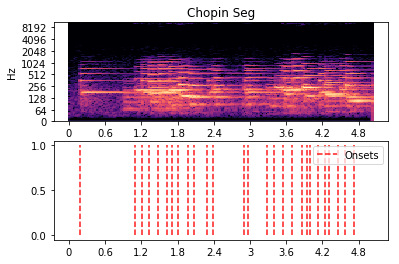

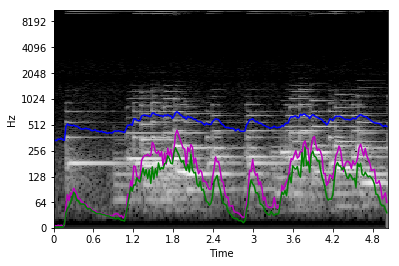

In [78]:
sig, sr, times = readOnsetCSV('chopinSeg.wav','chopinSeg_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv','Chopin Seg')
plotAll ('chopinSeg.wav' , 'chopinSeg_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'chopinSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'chopinSeg_vamp_vamp-libxtract_loudness_loudness.csv')
playAudio ('chopinSeg.wav')

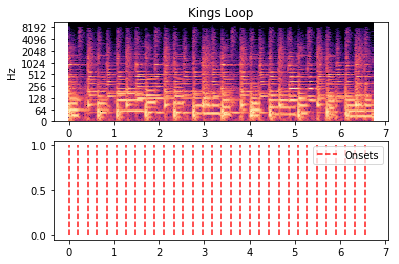

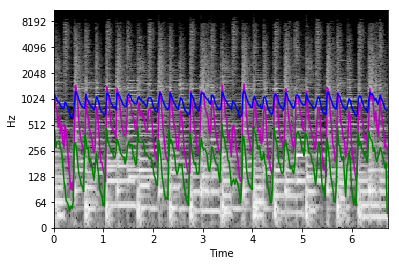

In [79]:
sig, sr, times = readOnsetCSV('kingsLoop.wav','kingsLoop_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', 'Kings Loop')
plotAll ('kingsLoop.wav' , 'kingsLoop_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'kingsLoop_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'kingsLoop_vamp_vamp-libxtract_loudness_loudness.csv')
playAudio ('kingsLoop.wav')

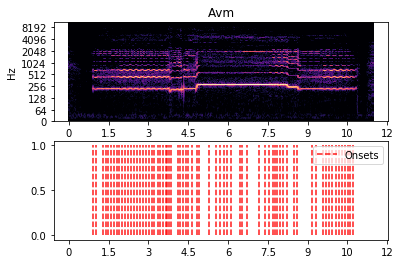

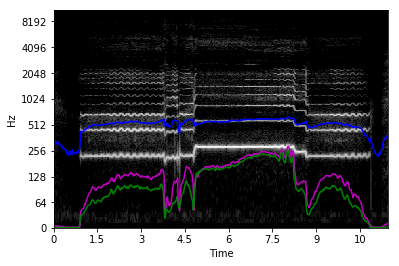

In [80]:
sig, sr, times = readOnsetCSV('avm.wav','avm_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', 'Avm')
plotAll ('avm.wav' , 'avm_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'avm_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'avm_vamp_vamp-libxtract_loudness_loudness.csv')
playAudio ('avm.wav')

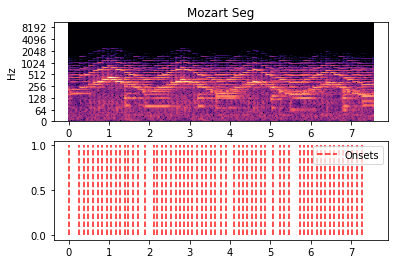

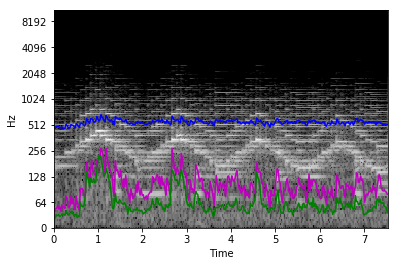

In [81]:
sig, sr, times = readOnsetCSV('mozartSeg.wav','mozartSeg_vamp_qm-vamp-plugins_qm-onsetdetector_onsets.csv', 'Mozart Seg')
plotAll ('mozartSeg.wav' , 'mozartSeg_vamp_bbc-vamp-plugins_bbc-intensity_intensity.csv', 'mozartSeg_vamp_bbc-vamp-plugins_bbc-energy_rmsenergy.csv', 'mozartSeg_vamp_vamp-libxtract_loudness_loudness.csv')
playAudio ('mozartSeg.wav')